In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../JbiclustGE/simulated_data/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "BiBit"
tool_suffix = "BiBit"
n_runs = 1

parameters = (("n_bics",[10,15,100]),
              ("pattern_bitsize",[8,16,32]),
              ("max_discr_val",[1.0,0.5,1.5,2.0])) 

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap

img_outdir = "../simulated_datasets/results/J/img"
tsv_outdir = "../simulated_datasets/results/J/"



In [4]:
for g in g_sizes:
    for s in s_sizes:
        params_folder = "n_bics=10,pattern_bitsize=8,max_discr_val=0.5"
        pred_bic_fname = pred_bic_fname_prefix+str(g)+","+str(s)+pred_bic_fname_suffix
        bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
        bics = parse_JBiclustGE(bic_file_path,n_runs=n_runs)[0]
        print(g,s,len(bics))

5 10 10
5 20 10
5 50 10
5 100 10
10 10 10
10 20 10
10 50 10
10 100 10
20 10 10
20 20 10
20 50 10
20 100 10
50 10 10
50 20 10
50 50 10
50 100 10
100 10 10
100 20 10
100 50 10
100 100 10


In [5]:
n_genes = 20
n_samples = 50
true_bic_fname = true_bic_fname_prefix+str(n_genes)+","+str(n_samples)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)



params_folder = "n_bics=10,pattern_bitsize=8,max_discr_val=0.5"
pred_bic_fname = pred_bic_fname_prefix+str(n_genes)+","+str(n_samples)+pred_bic_fname_suffix
pred_bic_fname
bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
bic_file_path 

'../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=8,max_discr_val=0.5/simulated.N=10.Mu=2.0.GxP=20,50.overlap=TT'

In [6]:
runs = parse_JBiclustGE(bic_file_path,n_runs=n_runs)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, len(pred_bics),np.mean(F1_per_bic(true_bics, pred_bics)) )


0 10 0.006988951910262742


In [7]:
results= read_all_results(parameters,tool_name,n_runs=n_runs, parse_biclust_func=parse_JBiclustGE,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix,
                          param_folder_delim=",")
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

Parameter combiations not found: 0
Successfull parameter combinations: 36
	files not found: 0
	files empty: 0
	failed to parse: 0
Total runs 720
Non-zero runs: 440


In [18]:
results["Geometric_Mean"] = np.sqrt(results["Relevance"]*results["Recovery"])
results

,n_genes,n_samples,max_discr_val,pattern_bitsize,n_bics,n_biclusters,Relevance,Recovery,Geometric_Mean
0,5,10,1.0,8,10,10,0.000000,0.000000,0.000000
1,5,20,1.0,8,10,10,0.000000,0.000000,0.000000
2,5,50,1.0,8,10,10,0.007207,0.007207,0.007207
3,5,100,1.0,8,10,10,0.012650,0.010889,0.011737
4,10,10,1.0,8,10,10,0.000000,0.000000,0.000000
5,10,20,1.0,8,10,10,0.000000,0.000000,0.000000
6,10,50,1.0,8,10,10,0.001569,0.001569,0.001569
7,10,100,1.0,8,10,10,0.007859,0.007663,0.007760
8,20,10,1.0,8,10,10,0.002343,0.002808,0.002565
9,20,20,1.0,8,10,10,0.008678,0.002414,0.004577


In [19]:
parameters

(('n_bics', [10, 15, 100]),
 ('pattern_bitsize', [8, 16, 32]),
 ('max_discr_val', [1.0, 0.5, 1.5, 2.0]))

Total combinations: 36
[(100, 8, 0.5) (100, 16, 2.0) (100, 16, 1.5) (100, 16, 1.0) (100, 16, 0.5)
 (100, 8, 2.0) (100, 8, 1.5) (100, 8, 1.0) (15, 16, 2.0) (15, 8, 1.5)
 (15, 8, 2.0) (15, 16, 0.5) (15, 16, 1.5) (15, 16, 1.0) (15, 8, 0.5)
 (15, 8, 1.0) (10, 16, 1.0) (10, 16, 1.5) (10, 16, 0.5) (10, 8, 2.0)]
Top 20 paramter combinations


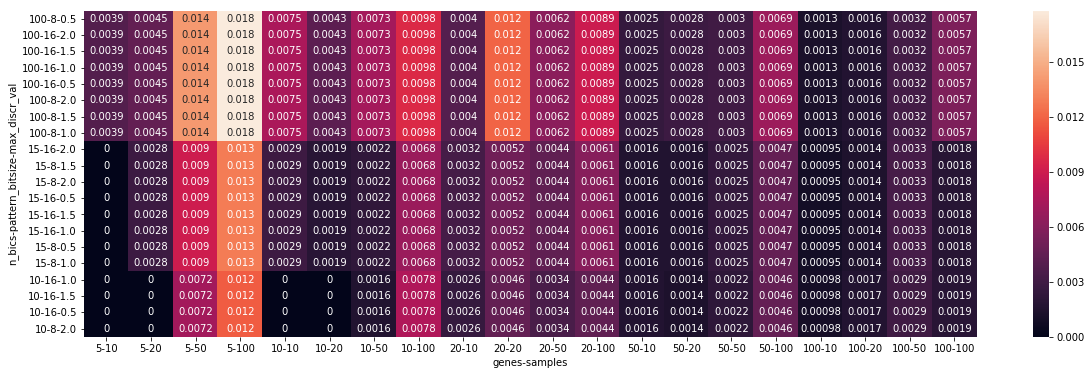

In [25]:
params = ["n_bics","pattern_bitsize","max_discr_val"]


heatmap = plot_performance_heatmap(results,params,top=20,what="Geometric_Mean",
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,outfile=heatmap_outfile)

In [26]:
parameters

(('n_bics', [10, 15, 100]),
 ('pattern_bitsize', [8, 16, 32]),
 ('max_discr_val', [1.0, 0.5, 1.5, 2.0]))

In [27]:
default_params = (10,16,1.0)

In [28]:
r = get_opt_params(results, params, heatmap, default_params=default_params, what="Geometric_Mean", more_n_smaples = 0)
r

All 720 runs considered

with Optimal parameters (Geometric_Mean --> max):
Geometric_Mean : 0.0063695893111158555
(100, 8, 1.0)
0.0	0.0	0.01	0.02	0.01	0.0	0.01	0.01	0.0	0.01	0.01	0.01	0.0	0.0	0.0	0.01	0.0	0.0	0.0	0.01
(100, 16, 2.0)
0.0	0.0	0.01	0.02	0.01	0.0	0.01	0.01	0.0	0.01	0.01	0.01	0.0	0.0	0.0	0.01	0.0	0.0	0.0	0.01
(100, 16, 1.5)
0.0	0.0	0.01	0.02	0.01	0.0	0.01	0.01	0.0	0.01	0.01	0.01	0.0	0.0	0.0	0.01	0.0	0.0	0.0	0.01
(100, 16, 1.0)
0.0	0.0	0.01	0.02	0.01	0.0	0.01	0.01	0.0	0.01	0.01	0.01	0.0	0.0	0.0	0.01	0.0	0.0	0.0	0.01
(100, 16, 0.5)
0.0	0.0	0.01	0.02	0.01	0.0	0.01	0.01	0.0	0.01	0.01	0.01	0.0	0.0	0.0	0.01	0.0	0.0	0.0	0.01
(100, 8, 2.0)
0.0	0.0	0.01	0.02	0.01	0.0	0.01	0.01	0.0	0.01	0.01	0.01	0.0	0.0	0.0	0.01	0.0	0.0	0.0	0.01
(100, 8, 1.5)
0.0	0.0	0.01	0.02	0.01	0.0	0.01	0.01	0.0	0.01	0.01	0.01	0.0	0.0	0.0	0.01	0.0	0.0	0.0	0.01
(100, 8, 0.5)
0.0	0.0	0.01	0.02	0.01	0.0	0.01	0.01	0.0	0.01	0.01	0.01	0.0	0.0	0.0	0.01	0.0	0.0	0.0	0.01
	n_bics=('Geometric_Mean', 'mean');
	pattern_bitsi

Geometric_Mean Relevance  Recovery  \
                                               mean      mean      mean   
n_bics pattern_bitsize max_discr_val                                      
100    8               1.0                  0.00637  0.003796  0.011342   
       16              2.0                  0.00637  0.003796  0.011342   
                       1.5                  0.00637  0.003796  0.011342   
                       1.0                  0.00637  0.003796  0.011342   
                       0.5                  0.00637  0.003796  0.011342   
       8               2.0                  0.00637  0.003796  0.011342   
                       1.5                  0.00637  0.003796  0.011342   
                       0.5                  0.00637  0.003796  0.011342   

                                     n_biclusters  
                                             mean  
n_bics pattern_bitsize max_discr_val               
100    8               1.0                    100  
       16              2.0                    100  
                       1.5                    100  
                       1.0                    100  
                       0.5                    100  
       8               2.0                    100  
                       1.5                    100  
                       0.5                    100